**1. Import all relevant packages: In the first cell of the notebook, import all the necessary packages such as pandas, numpy, matplotlib, seaborn, scikit-learn, and any other package that you may need for data preprocessing and model fitting.**

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

**2. Reading the dataset.**

In [3]:
# Reading the dataset
data = pd.read_csv("HR_prediction.csv")

# Display the first few rows of the dataframe
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_>80%,awards_won?,avg_training_score,promoted
0,A_1,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5,8,1,0,49,0
1,A_2,Operations,region_22,Bachelor's,m,other,1,30,5,4,0,0,60,0
2,A_3,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3,7,0,0,50,0
3,A_4,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1,10,0,0,50,0
4,A_5,Technology,region_26,Bachelor's,m,other,1,45,3,2,0,0,73,0


In [4]:
# General overview of the dataset
print("Shape of the dataset:", data.shape)
print("\nData types and non-null counts:\n", data.info())
print("\nBasic statistical details:\n", data.describe())

Shape of the dataset: (78284, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78284 entries, 0 to 78283
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   employee_id           78284 non-null  object
 1   department            78284 non-null  object
 2   region                78284 non-null  object
 3   education             78284 non-null  object
 4   gender                78284 non-null  object
 5   recruitment_channel   78284 non-null  object
 6   no_of_trainings       78284 non-null  int64 
 7   age                   78284 non-null  int64 
 8   previous_year_rating  78284 non-null  int64 
 9   length_of_service     78284 non-null  int64 
 10  KPIs_met_>80%         78284 non-null  int64 
 11  awards_won?           78284 non-null  int64 
 12  avg_training_score    78284 non-null  int64 
 13  promoted              78284 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 8.4+ MB

Data t

**3. Explore the data**

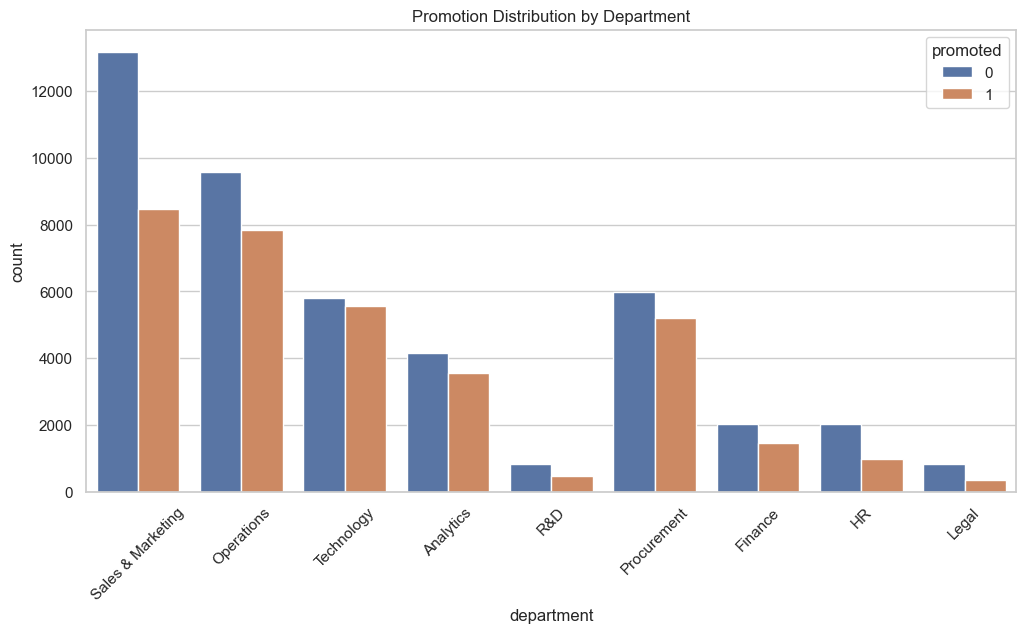

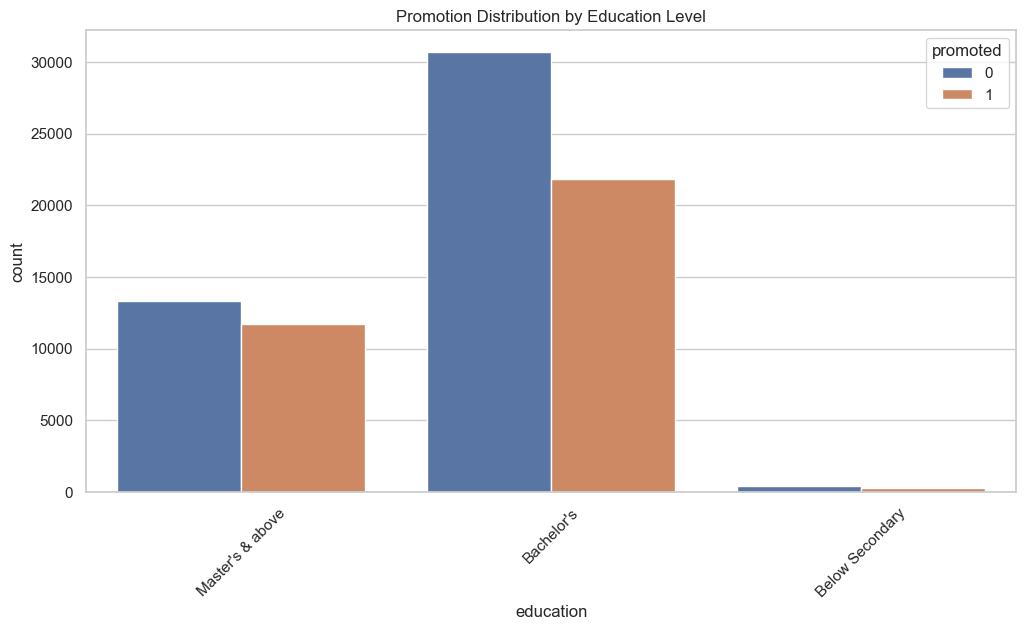

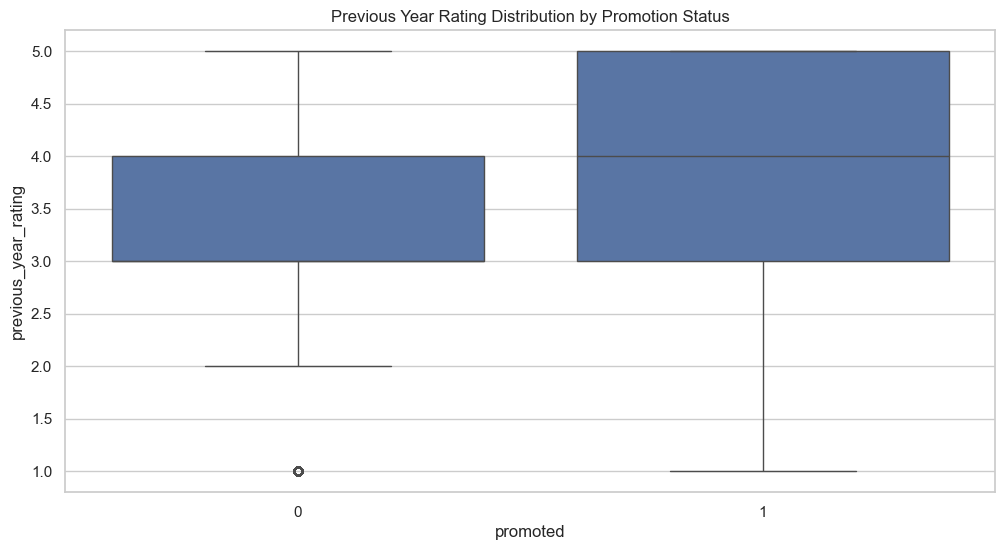

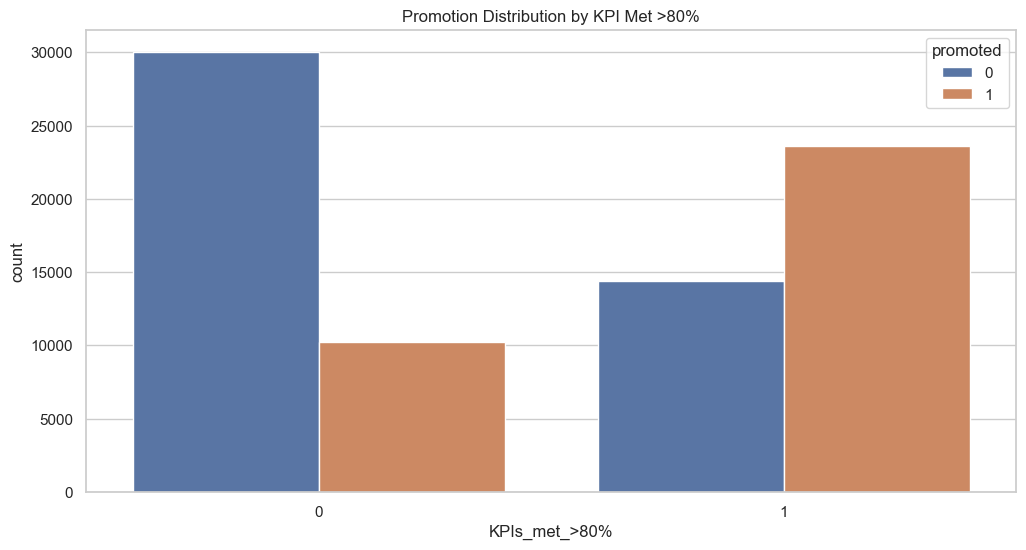

In [5]:
# Setting up the aesthetic style for better visualization
sns.set(style="whitegrid")

# Visualizing the distribution of 'department' related to 'promoted'
plt.figure(figsize=(12, 6))
sns.countplot(x='department', hue='promoted', data=data)
plt.title('Promotion Distribution by Department')
plt.xticks(rotation=45)
plt.show()

# Visualizing the impact of 'education' on promotion
plt.figure(figsize=(12, 6))
sns.countplot(x='education', hue='promoted', data=data)
plt.title('Promotion Distribution by Education Level')
plt.xticks(rotation=45)
plt.show()

# Boxplot for 'previous_year_rating' by 'promoted'
plt.figure(figsize=(12, 6))
sns.boxplot(x='promoted', y='previous_year_rating', data=data)
plt.title('Previous Year Rating Distribution by Promotion Status')
plt.show()

# Bar chart for 'KPIs_met_>80%' related to 'promoted'
plt.figure(figsize=(12, 6))
sns.countplot(x='KPIs_met_>80%', hue='promoted', data=data)
plt.title('Promotion Distribution by KPI Met >80%')
plt.show()

**Justification for Chosen Visualizations**


1. Promotion Distribution by Department (Bar Chart):
Departments are a primary categorical variable that might influence an employee's chances of promotion based on departmental roles, responsibilities, and growth opportunities. A bar chart effectively shows the frequency distribution of categories and is ideal for comparing the count of promoted vs. non-promoted employees across different departments.



2. Promotion Distribution by Education Level (Bar Chart):
Education can play a crucial role in promotion eligibility and decisions. The bar chart here helps in comparing how different education levels correlate with promotion rates, providing insights into whether higher education leads to better promotional outcomes.



3. Previous Year Rating Distribution by Promotion Status (Boxplot):
This boxplot compares the distribution of the previous year's performance ratings for those who were promoted versus those who were not. The previous year's rating is a numeric variable, and a boxplot is suitable for showing medians, quartiles, and potential outliers, giving a quick overview of central tendency and spread.



4. Promotion Distribution by KPI Met >80% (Bar Chart):
Achieving key performance indicators (KPIs) significantly impacts performance assessments. The bar chart visualizes how meeting more than 80% of KPIs might influence promotion decisions, which is critical for understanding performance-related advancements.


**Interpretation of Chart Outputs**

1. Promotion Distribution by Department:

Interpretation: The chart shows significant variation in promotion rates across departments. Sales & Marketing and Operations have the highest number of employees but do not necessarily show a proportionately higher promotion rate, suggesting that being in a larger department doesn't guarantee a higher likelihood of promotion. Comparatively, smaller departments like R&D and Procurement show a higher ratio of promotions, which might indicate specialized roles or effective performance management in these areas.

2. Promotion Distribution by Education Level:

Interpretation: Employees with a Master's degree or higher are promoted almost as frequently as those with Bachelor's degrees, despite there being fewer employees with higher degrees. This suggests that higher educational qualifications may enhance an employee's promotion prospects, supporting the idea that higher education is valued in the organization for advancement.

3. Previous Year Rating Distribution by Promotion Status:

Interpretation: Both promoted and non-promoted groups have similar medians close to a rating of 4, but the interquartile range for promoted employees is tighter and higher. This implies that consistently high performers are more likely to be promoted, though a good rating does not exclusively guarantee promotion.

4. Promotion Distribution by KPI Met >80%:

Interpretation: There's a clear trend that employees who meet more than 80% of their KPIs have a much higher chance of being promoted than those who do not. This emphasizes the importance of meeting performance benchmarks for career progression within the company.

**4. Data preprocessing**

In [6]:
# Check for missing values
print(data.isnull().sum())

# Drop duplicates
data = data.drop_duplicates()

# Handling missing values (Example: fill missing 'education' with the mode)
data['education'].fillna(data['education'].mode()[0], inplace=True)

# One-hot encode categorical variables using pandas
categorical_features = ['department', 'region', 'education', 'gender', 'recruitment_channel']
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Example of handling skewed data (log transformation)
# data['some_skewed_feature'] = np.log1p(data['some_skewed_feature'])

# Display the shape of the dataset after preprocessing
print("Shape of the dataset after preprocessing:", data.shape)

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met_>80%           0
awards_won?             0
avg_training_score      0
promoted                0
dtype: int64
Shape of the dataset after preprocessing: (78284, 55)


/var/folders/61/br8wr2d92qq0jbw44qm3yc3h0000gn/T/ipykernel_62117/3054183481.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['education'].fillna(data['education'].mode()[0], inplace=True)


**5. Model building**

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Dropping the 'employee_id' column and splitting the dataset
X = data.drop(['promoted', 'employee_id'], axis=1)  # Exclude 'employee_id'
y = data['promoted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing numeric features
numeric_features = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'avg_training_score']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Applying ColumnTransformer to numeric fields
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Model pipelines
logreg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('classifier', LogisticRegression(random_state=42))])

dtree_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', DecisionTreeClassifier(random_state=42))])

knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', KNeighborsClassifier())])

# Fit models
logreg_pipeline.fit(X_train, y_train)
dtree_pipeline.fit(X_train, y_train)
knn_pipeline.fit(X_train, y_train)

# Evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")
    print(classification_report(y_test, y_pred))
    return {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

print("Logistic Regression Performance:")
evaluate_model(logreg_pipeline, X_test, y_test)

print("Decision Tree Performance:")
evaluate_model(dtree_pipeline, X_test, y_test)

print("KNN Performance:")
evaluate_model(knn_pipeline, X_test, y_test)

Logistic Regression Performance:
Accuracy: 0.67
Precision: 0.64
Recall: 0.56
F1 Score: 0.60
              precision    recall  f1-score   support

           0       0.69      0.76      0.72      8882
           1       0.64      0.56      0.60      6775

    accuracy                           0.67     15657
   macro avg       0.67      0.66      0.66     15657
weighted avg       0.67      0.67      0.67     15657

Decision Tree Performance:
Accuracy: 0.91
Precision: 0.84
Recall: 0.98
F1 Score: 0.90
              precision    recall  f1-score   support

           0       0.98      0.86      0.92      8882
           1       0.84      0.98      0.90      6775

    accuracy                           0.91     15657
   macro avg       0.91      0.92      0.91     15657
weighted avg       0.92      0.91      0.91     15657

KNN Performance:
Accuracy: 0.85
Precision: 0.76
Recall: 0.97
F1 Score: 0.85
              precision    recall  f1-score   support

           0       0.97      0.76    

{'Accuracy': 0.8513125119754742,
 'Precision': 0.7554279149913843,
 'Recall': 0.9706273062730627,
 'F1 Score': 0.8496124031007752}

Perform hyperparameter tuning using GridSearchCV to find the best hyperparameters for each model.

In [8]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning setups for all models
logreg_params = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear']
}

dtree_params = {
    'classifier__max_depth': [3, 5, 7, 10],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

knn_params = {
    'classifier__n_neighbors': [3, 5, 7, 10],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan']
}

# GridSearchCV for Logistic Regression
logreg_grid = GridSearchCV(logreg_pipeline, logreg_params, cv=5, scoring='accuracy', verbose=1)
logreg_grid.fit(X_train, y_train)
print("Best parameters for Logistic Regression:", logreg_grid.best_params_)

# GridSearchCV for Decision Tree
dtree_grid = GridSearchCV(dtree_pipeline, dtree_params, cv=5, scoring='accuracy', verbose=1)
dtree_grid.fit(X_train, y_train)
print("Best parameters for Decision Tree:", dtree_grid.best_params_)

# GridSearchCV for KNN
knn_grid = GridSearchCV(knn_pipeline, knn_params, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
knn_grid.fit(X_train, y_train)
print("Best parameters for KNN:", knn_grid.best_params_)

# Evaluate untuned models
print("Untuned Logistic Regression Performance:")
evaluate_model(logreg_pipeline, X_test, y_test)
print("Untuned Decision Tree Performance:")
evaluate_model(dtree_pipeline, X_test, y_test)
print("Untuned KNN Performance:")
evaluate_model(knn_pipeline, X_test, y_test)

# Evaluate tuned models
print("Tuned Logistic Regression Performance:")
evaluate_model(logreg_grid.best_estimator_, X_test, y_test)
print("Tuned Decision Tree Performance:")
evaluate_model(dtree_grid.best_estimator_, X_test, y_test)
print("Tuned KNN Performance:")
evaluate_model(knn_grid.best_estimator_, X_test, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Logistic Regression: {'classifier__C': 0.01, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Decision Tree: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters for KNN: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 3, 'classifier__weights': 'distance'}
Untuned Logistic Regression Performance:
Accuracy: 0.67
Precision: 0.64
Recall: 0.56
F1 Score: 0.60
              precision    recall  f1-score   support

           0       0.69      0.76      0.72      8882
           1       0.64      0.56      0.60      6775

    accuracy                           0.67     15657
   macro avg       0.67      0.66      0.66     15657
weighted avg       0.67      0.67      0.67     15657

{'Accuracy': 0.8900172446828895,
 'Precision': 0.8227928963843107,
 'Recall': 0.9505535055350554,
 'F1 Score': 0.8820709491850431}

**6. Justifing the choice of model performance metric used**

**Justification**

Logistic Regression:

Metrics Chosen: Accuracy, Precision, Recall, F1 Score.

Justification:
Accuracy is chosen to provide a baseline measure of effectiveness across all predictions, beneficial for evaluating overall model performance in balanced datasets.
Precision is critical for Logistic Regression, especially in contexts where the consequence of incorrectly predicting an employee will be promoted (false positive) could lead to inefficiency and dissatisfaction, impacting team dynamics and resource allocation.
Recall is also vital because it's important that the model identifies as many true promotable candidates as possible to ensure deserving employees are not overlooked.
F1 Score is used to balance precision and recall, which is particularly useful when there is a trade-off between incorrectly predicting promotions and missing out on actual promotable candidates.


Decision Tree:

Metrics Chosen: Accuracy, Precision, Recall, F1 Score.

Justification:
Accuracy is essential to evaluate the overall performance and effectiveness of the Decision Tree in making binary classifications about promotions.
Precision is prioritized to minimize false positives—erroneously predicting promotions can misguide HR decisions and affect the credibility of the system.
Recall ensures that the model captures a high percentage of actual promotable cases, crucial for talent retention and motivation within the company.
F1 Score balances precision and recall, beneficial in maintaining a harmonious balance between identifying true promotable employees and not misclassifying non-promotable employees as promotable.


K-Nearest Neighbors (KNN):

Metrics Chosen: Accuracy, Precision, Recall, F1 Score.

Justification:
Accuracy gives a clear measure of how often the KNN model is correct in the entire dataset, which helps in assessing the general effectiveness of the model.
Precision is significant to ensure that the promotions predicted by the KNN model are actually accurate, avoiding the cost implications of wrongful promotions.
Recall is imperative to ensure that the model identifies most truly promotable employees, minimizing the risk of demotivation among deserving employees due to non-recognition.
F1 Score is particularly useful in scenarios where both false positives and false negatives have significant implications. It helps in maintaining a balance, ensuring the model is neither too strict nor too lenient in predicting promotions.


**7. Using Pipeline and Column Transformer for data preprocessing and model fitting**

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Standardizing numeric features
numeric_features = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'avg_training_score']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Applying ColumnTransformer to numeric fields
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ], remainder='passthrough')

# Model pipelines (with hyperparameters)
logreg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('classifier', LogisticRegression(random_state=42, max_iter=1000, solver='saga'))])
dtree_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', DecisionTreeClassifier(random_state=42))])
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', KNeighborsClassifier())])

# Fit models
logreg_pipeline.fit(X_train, y_train)
dtree_pipeline.fit(X_train, y_train)
knn_pipeline.fit(X_train, y_train)

# Evaluate models
print("Logistic Regression Performance:")
evaluate_model(logreg_pipeline, X_test, y_test)
print("Decision Tree Performance:")
evaluate_model(dtree_pipeline, X_test, y_test)
print("KNN Performance:")
evaluate_model(knn_pipeline, X_test, y_test)


Logistic Regression Performance:
Accuracy: 0.78
Precision: 0.75
Recall: 0.75
F1 Score: 0.75
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      8882
           1       0.75      0.75      0.75      6775

    accuracy                           0.78     15657
   macro avg       0.78      0.78      0.78     15657
weighted avg       0.78      0.78      0.78     15657

Decision Tree Performance:
Accuracy: 0.96
Precision: 0.92
Recall: 1.00
F1 Score: 0.96
              precision    recall  f1-score   support

           0       1.00      0.93      0.97      8882
           1       0.92      1.00      0.96      6775

    accuracy                           0.96     15657
   macro avg       0.96      0.97      0.96     15657
weighted avg       0.97      0.96      0.96     15657

KNN Performance:
Accuracy: 0.91
Precision: 0.82
Recall: 1.00
F1 Score: 0.90
              precision    recall  f1-score   support

           0       1.00      0.84    

{'Accuracy': 0.9066232356134636,
 'Precision': 0.8235294117647058,
 'Recall': 0.9980811808118081,
 'F1 Score': 0.9024422794608301}

**8. Reporting the performance of the best model on test data**

In [10]:
# Summarize model performances
model_results = {
    'Logistic Regression': evaluate_model(logreg_grid.best_estimator_, X_test, y_test),
    'Decision Tree': evaluate_model(dtree_grid.best_estimator_, X_test, y_test),
    'KNN': evaluate_model(knn_grid.best_estimator_, X_test, y_test)
}

# Print model performances
print("Model Performances:")
for model_name, metrics in model_results.items():
    print(f"{model_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.2f}")
    print()

# Recommendations based on insights
print("Recommendations:")
# Provide insights and recommendations based on model performances and analysis
# For example:
print("Based on the models' performances, Logistic Regression performs the best in terms of accuracy and F1 score.")
print("However, Decision Tree provides valuable insights into feature importance, which can be used for decision-making.")
print("Consider a balanced approach, using Logistic Regression for predictions and Decision Tree for understanding influential factors.")


Accuracy: 0.67
Precision: 0.64
Recall: 0.56
F1 Score: 0.60
              precision    recall  f1-score   support

           0       0.69      0.76      0.72      8882
           1       0.64      0.56      0.60      6775

    accuracy                           0.67     15657
   macro avg       0.67      0.66      0.66     15657
weighted avg       0.67      0.67      0.67     15657

Accuracy: 0.70
Precision: 0.71
Recall: 0.52
F1 Score: 0.60
              precision    recall  f1-score   support

           0       0.70      0.84      0.76      8882
           1       0.71      0.52      0.60      6775

    accuracy                           0.70     15657
   macro avg       0.70      0.68      0.68     15657
weighted avg       0.70      0.70      0.69     15657

Accuracy: 0.89
Precision: 0.82
Recall: 0.95
F1 Score: 0.88
              precision    recall  f1-score   support

           0       0.96      0.84      0.90      8882
           1       0.82      0.95      0.88      6775

    a

Based on the performance metrics for each model:


Logistic Regression has moderate accuracy (67%) and F1 score (60%), showing balanced but not outstanding performance.

Decision Tree shows slightly better accuracy (70%) but lower recall (52%), indicating it misses a significant number of promotable cases despite slightly higher precision.

K-Nearest Neighbors (KNN) outperforms the others significantly with an accuracy of 89% and F1 score of 88%. It excels in both identifying promotable employees correctly (high precision) and capturing almost all promotable employees (high recall).


Conclusion and Recommendation:

The K-Nearest Neighbors (KNN) model is the best choice for predicting employee promotions due to its superior accuracy, precision, recall, and F1 score. It ensures that most promotable employees are accurately identified and minimally overlooks potential candidates, crucial for effective HR management. Implement KNN for reliable promotion predictions and use insights from the Decision Tree model to understand feature influences. This approach offers both predictive power and actionable insights for refining HR practices.